In [1]:
import numpy as np
import porepy as pp
import scipy.sparse as sps
import sys
sys.path.append("./class")
from Flow_class import Flow
from Transport_class import Transport
from Reaction_class import Reaction

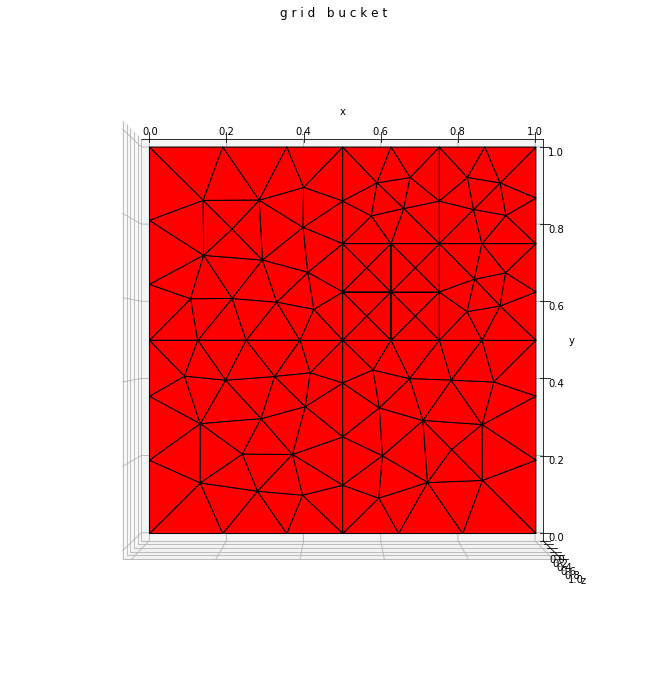

In [2]:
mesh_args = {"mesh_size_frac": 0.2, "mesh_size_bound": 0.3}
gb, domain = pp.grid_buckets_2d.benchmark_regular(mesh_args)
#http://localhost:8888/edit/Scrivania/porepy/src/porepy/grids/standard_grids/grid_buckets_2d.py
pp.plot_grid(gb,figsize=(15,12))

In [3]:
parameter={"aperture":1e-3,
          "fracture_perm":0.01,
          "perm":1,
          #"f_lambda":lambda x,y,z:math.pi*math.pi*2*math.sin(math.pi*x)*math.sin(math.pi*y),
          "f_lambda":lambda x,y,z:0.0,
          "bc_value":[0.0,0.0],
          "bc_type":['dir','dir'],
          "method":"Tpfa"}

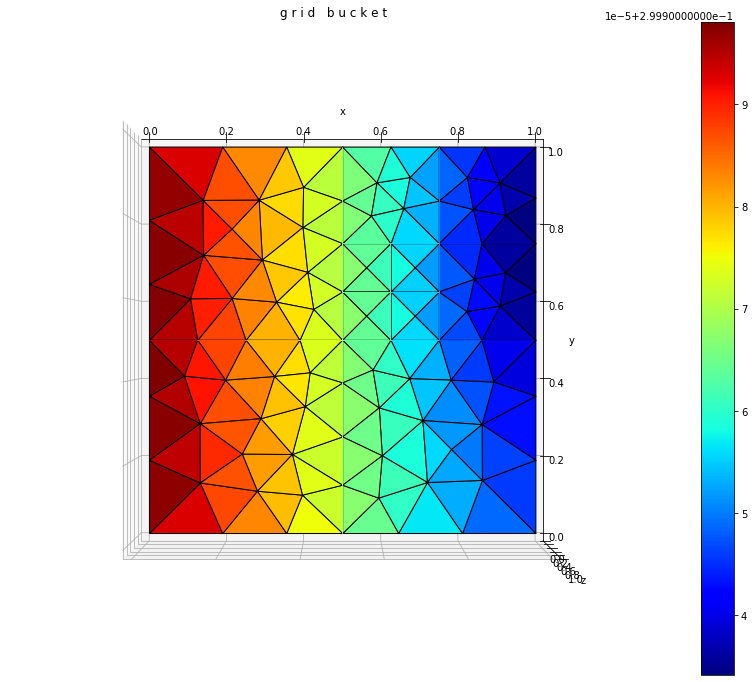

In [4]:
flow=Flow(gb,domain,parameter)
flow.add_data()
flow.discretize()
flow.solve()
flow.plot_pressure()

In [5]:
parameter={
    "aperture":1e-4,
    "por":0.2,
    "por_frac":0.8,
    #"time_step":1 / 60,
    "time_step":34.56,
    #"t_max":1 /3,
    #"t_max":345600,
    "t_max":7000,
    "initial_cond":lambda x,y,z:0.0}

transport=Transport(gb,domain,parameter)

In [6]:
Ca_value=[0.0,0.0]
Ca_type=['dir','dir']
#CaSiO3_value=[1.0,0.0]
CaSiO3_value=[0.0,0.0]
CaSiO3_type=['dir','dir']
Ca="Ca"
CaSiO3="CaSiO3"

In [7]:
reaction_data={"temperature":423,
       "A":1.9e-2,
       "rate_const":0.004466,
       #"rate_const":0.0,
       "E":4700,
       "R":8.314,
       "K_eq":10e9,
       "ph":3.5,
       "mass_weight":1}
reaction=Reaction(reaction_data)
reaction.set_const_rate()
print(reaction.const_rate)

2.229802863847148e-05


In [8]:
transport.set_data(Ca_value,Ca_type,Ca)
transport.get_flux(Ca)
transport.discretize(Ca)
lhs_Ca,rhs_source_adv_Ca,rhs_mass_Ca,assembler_Ca=transport.get_transport_lhs_rhs(Ca)

mass
  (0, 0)	0.00141308734725761
  (1, 1)	0.0015078998097108436
  (2, 2)	0.001700173872549863
  (3, 3)	0.0013776168848364378
  (4, 4)	0.0013449780216077238
  (5, 5)	0.0012406190213829125
  (6, 6)	0.0012406190213829125
  (7, 7)	0.001575672599690764
  (8, 8)	0.0015089867458242215
  (9, 9)	0.0010208872207623483
  (10, 10)	0.0016794389177668383
  (11, 11)	0.001352714505217841
  (12, 12)	0.0016910800447124113
  (13, 13)	0.0010159683829931564
  (14, 14)	0.0015426135486370192
  (15, 15)	0.0021878527252302163
  (16, 16)	0.002321639157847542
  (17, 17)	0.0021789042034385635
  (18, 18)	0.001793599736340773
  (19, 19)	0.0023060995737542948
  (20, 20)	0.0022761301265064914
  (21, 21)	0.0010529876751785997
  (22, 22)	0.0010529876751785966
  (23, 23)	0.0013541388072627976
  (24, 24)	0.001307099753560135
  :	:
  (178, 178)	1e-05
  (179, 179)	1e-05
  (180, 180)	8.830369177371963e-06
  (181, 181)	1.1169630822628038e-05
  (182, 182)	1e-05
  (183, 183)	1e-05
  (184, 184)	8.830369177371963e-06
  (185, 18

P0_flux
[[ 6.08079474e-05  5.81709554e-05  5.62845488e-05  5.87286485e-05
   5.64454488e-05  6.49127166e-05  6.36812572e-05  4.60908257e-05
   5.76490913e-05  6.41360891e-05  6.01309205e-05  5.49368092e-05
   6.06058397e-05  5.95208919e-05  6.09998592e-05  5.10329415e-05
   5.66876270e-05  5.84866532e-05  4.90103665e-05  4.02640522e-05
   5.89830454e-05  6.09363097e-05  6.31792436e-05  5.85367527e-05
   5.91519131e-05  5.36005470e-05  5.98182574e-05  6.24431431e-05
   7.45042985e-05  7.17616364e-05  6.11695044e-05  6.21011523e-05
   3.51738924e-05  5.93538618e-05  4.41603829e-05  6.01780710e-05
   6.30963232e-05  5.94710524e-05  7.02137726e-05  7.03776766e-05
   6.09844110e-05  6.16627794e-05  5.98606157e-05  6.87909816e-05
   6.78766208e-05  5.67700569e-05  5.05433253e-05  5.74946927e-05
   6.76472512e-05  5.56914047e-05  5.76803018e-05  4.88374972e-05
   5.99551544e-05  5.73479809e-05  6.54866666e-05  5.65288509e-05
   4.92581779e-05  6.39712772e-05  5.84393364e-05  5.33600000e-05
  

/home/dell/anaconda3/lib/python3.8/site-packages/porepy/viz/plot_grid.py:127: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


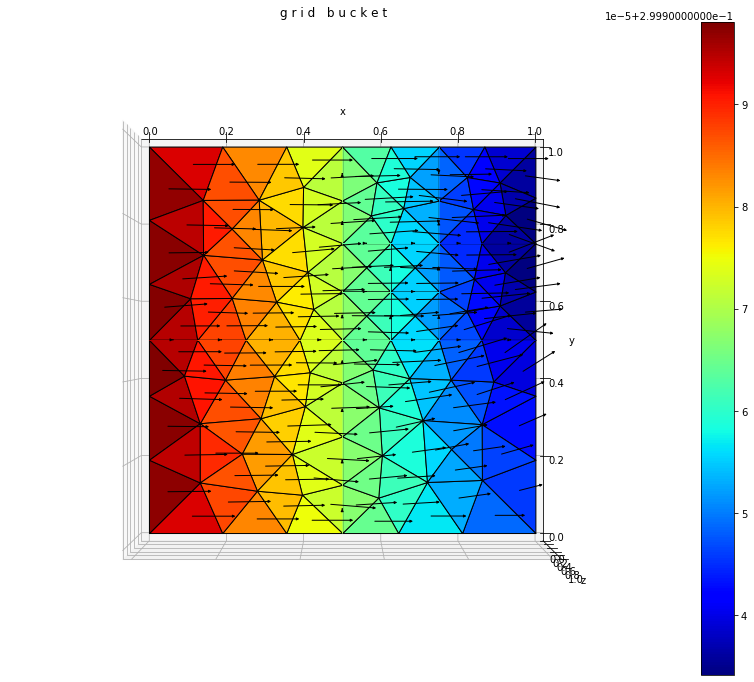

In [9]:
## to export the flux
key='Ca'
flux='darcy_flux'
mortar='mortar_flux'
flux_P0="P0_flux"

discr_P0_flux = pp.MVEM(key)
for g, d in gb:
    discr_P0_flux.discretize(g, d)
    d[pp.STATE][flux] = d[pp.PARAMETERS][key][flux]

## construct the P0 flux reconstruction
pp.project_flux(gb, discr_P0_flux, flux, flux_P0, mortar)

for g,d in gb:
    print("P0_flux")
    print(d[pp.STATE]["P0_flux"])

for g,d in gb:
    print("pressure")
    print(d[pp.STATE]["pressure"])
    
for g,d in gb:
    d[pp.STATE]["P0_flux"]*=2000
pp.plot_grid(gb,"pressure","P0_flux",figsize=(15,12))

In [10]:
for g,d in gb:
    #d[pp.PARAMETERS]["Ca"]["darcy_flux"]=0.0*d[pp.PARAMETERS]["Ca"]["darcy_flux"]
    print("velocity")
    print(d[pp.PARAMETERS]["Ca"]["darcy_flux"])

velocity
[-9.01841350e-06 -8.82754984e-06  0.00000000e+00 -6.06456126e-06
  5.68309872e-06  6.67000000e-06  6.67000000e-06  0.00000000e+00
  1.81749112e-06  5.14225761e-06  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -5.79984304e-06 -4.99536780e-06  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -6.01127430e-06  6.01892976e-06
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -3.96309695e-06
 -3.07268870e-06 -4.55778067e-06  3.87585192e-06  6.67000000e-06
  6.67000000e-06  0.00000000e+00  2.84298823e-06  2.87630038e-06
  0.00000000e+00  0.00000000e+00  0.00000000e+00  5.84871347e-06
 -7.59896539e-06  3.44734730e-06 -4.24108209e-06  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -5.01496981e-06  4.75697783e-06
  0.00000000e+00  0.00000000e+00 -3.20540066e-06  3.53645244e-06
  3.67939821e-06 -2.56087347e-06  0.00000000e+00  0.00000000e+00
  2.09008701e-06  3.46754357e-06 -3.66210708e-06 -3.78899176e-06
  0.00000000e+00  0.00000000e+00 -6.92227569e-06  5.10077931e-06
 -3.16754455e-06

In [11]:
transport.set_data(CaSiO3_value,CaSiO3_type,CaSiO3)
transport.get_flux(CaSiO3)    
transport.discretize(CaSiO3)
lhs_CaSiO3,rhs_source_adv_CaSiO3,rhs_mass_CaSiO3,assembler_CaSiO3=transport.get_transport_lhs_rhs(CaSiO3)

mass
  (0, 0)	0.00141308734725761
  (1, 1)	0.0015078998097108436
  (2, 2)	0.001700173872549863
  (3, 3)	0.0013776168848364378
  (4, 4)	0.0013449780216077238
  (5, 5)	0.0012406190213829125
  (6, 6)	0.0012406190213829125
  (7, 7)	0.001575672599690764
  (8, 8)	0.0015089867458242215
  (9, 9)	0.0010208872207623483
  (10, 10)	0.0016794389177668383
  (11, 11)	0.001352714505217841
  (12, 12)	0.0016910800447124113
  (13, 13)	0.0010159683829931564
  (14, 14)	0.0015426135486370192
  (15, 15)	0.0021878527252302163
  (16, 16)	0.002321639157847542
  (17, 17)	0.0021789042034385635
  (18, 18)	0.001793599736340773
  (19, 19)	0.0023060995737542948
  (20, 20)	0.0022761301265064914
  (21, 21)	0.0010529876751785997
  (22, 22)	0.0010529876751785966
  (23, 23)	0.0013541388072627976
  (24, 24)	0.001307099753560135
  :	:
  (178, 178)	1e-05
  (179, 179)	1e-05
  (180, 180)	8.830369177371963e-06
  (181, 181)	1.1169630822628038e-05
  (182, 182)	1e-05
  (183, 183)	1e-05
  (184, 184)	8.830369177371963e-06
  (185, 18

In [12]:
print(transport.mortar_variable)

mortar_tracer


In [13]:
save_every = 1
n_steps = int(np.round(parameter["t_max"] / parameter["time_step"]))

# Initial condition
tracer1 = np.zeros(rhs_source_adv_Ca.size)
assembler_Ca.distribute_variable(
    tracer1, variable_names=[Ca,transport.mortar_variable]
)

tracer2 = 16.7504*np.ones(rhs_source_adv_CaSiO3.size)
assembler_CaSiO3.distribute_variable(
    tracer2, variable_names=[CaSiO3,transport.mortar_variable]
)


# Exporter
exporter1 = pp.Exporter(gb, file_name="Ca", folder_name="Ca")
export_field1 = ["Ca"]
IEsolver_Ca = sps.linalg.factorized(lhs_Ca)

exporter2= pp.Exporter(gb, file_name="CaSiO3", folder_name="CaSiO3")
export_field2 = ["CaSiO3"]
IEsolver_CaSiO3 = sps.linalg.factorized(lhs_CaSiO3)

/home/dell/.local/lib/python3.8/site-packages/scipy/sparse/linalg/dsolve/linsolve.py:318: SparseEfficiencyWarning: splu requires CSC matrix format
  warn('splu requires CSC matrix format', SparseEfficiencyWarning)


CaSiO3
[16.7504 16.7504 16.7504 16.7504 16.7504 16.7504 16.7504 16.7504 16.7504
 16.7504 16.7504 16.7504 16.7504 16.7504 16.7504 16.7504 16.7504 16.7504
 16.7504 16.7504 16.7504 16.7504 16.7504 16.7504 16.7504 16.7504 16.7504
 16.7504 16.7504 16.7504 16.7504 16.7504 16.7504 16.7504 16.7504 16.7504
 16.7504 16.7504 16.7504 16.7504 16.7504 16.7504 16.7504 16.7504 16.7504
 16.7504 16.7504 16.7504 16.7504 16.7504 16.7504 16.7504 16.7504 16.7504
 16.7504 16.7504 16.7504 16.7504 16.7504 16.7504 16.7504 16.7504 16.7504
 16.7504 16.7504 16.7504 16.7504 16.7504 16.7504 16.7504 16.7504 16.7504
 16.7504 16.7504 16.7504 16.7504 16.7504 16.7504 16.7504 16.7504 16.7504
 16.7504 16.7504 16.7504 16.7504 16.7504 16.7504 16.7504 16.7504 16.7504
 16.7504 16.7504 16.7504 16.7504 16.7504 16.7504 16.7504 16.7504 16.7504
 16.7504 16.7504 16.7504 16.7504 16.7504 16.7504 16.7504 16.7504 16.7504
 16.7504 16.7504 16.7504 16.7504 16.7504 16.7504 16.7504 16.7504 16.7504
 16.7504 16.7504 16.7504 16.7504 16.7504 16.

CaSiO3
[16.65353609 16.66025145 16.57654056 16.59662461 11.00838147 16.66025147
 16.65817808 16.66025148 16.63206064 16.66025146 16.66025079 16.65718717
 15.79562475 16.66024872  4.71055132 16.66023916  6.66665603  6.12490715
 16.6602376  16.66025148 16.31957736 16.6602423  16.66025148 15.87375816
 16.58081662 16.65942818 16.26815835 15.91130652 16.66025016 16.66025115
 16.63274441 16.07133345 16.66025146 12.92170538 16.66025126  6.28266723
 16.48294799 16.41165644 16.6602514  16.66024711 12.65098733  5.82738204
 16.65664984 16.66025113 16.66023716 14.2977079  16.66025148 16.66025146
 16.66025074 16.66019796 15.9933661  16.66024754 16.63690501 16.65815718
 16.66023915 16.37680341 16.66025078 16.65204874 16.62944836 16.66025148
 16.65973807 16.66016943 16.4676669  16.35201933 16.66001758 16.40554878
 10.44275792 16.65924059 16.54183673 16.66025145 15.66507829 16.64679439
 11.17050502 16.66025132 16.66025134 16.65311877 16.65784245 16.66005671
 16.53238041 12.17155437 16.66024948 16.6597

CaSiO3
[16.56045531 16.60895537 16.19514658 16.28136419  7.45299363 16.60895619
 16.59035072 16.60895632 16.45283358 16.6089555  16.60893692 16.5813706
 14.11154488 16.60889047  2.2816089  16.60873881  3.93794537  3.44689217
 16.6086987  16.60895643 15.49392412 16.60877036 16.60895623 14.29450362
 16.20999346 16.59982401 15.34682404 14.39422047 16.60891966 16.60894572
 16.44490474 14.79646197 16.60895579 10.02286109 16.60895068  3.58742983
 15.88720072 15.64309739 16.60895309 16.60885221  9.63918595  3.18745421
 16.57812224 16.6089444  16.60866309 11.47130577 16.60895631 16.60895549
 16.60893437 16.60809019 14.61831076 16.60886974 16.45980012 16.58810913
 16.60869533 15.53784821 16.60893787 16.55025047 16.43939345 16.60895648
 16.60322243 16.60779037 15.83670287 15.44245944 16.60586555 15.61962614
  6.79979789 16.5984111  16.11044165 16.60895542 13.78919166 16.51674417
  7.66643296 16.60895099 16.60895152 16.55155898 16.58522001 16.60613149
 16.07384701  8.95004542 16.60891332 16.60379

CaSiO3
[16.12318091 16.51947339 14.50370365 14.82279158  3.37473403 16.51953236
 16.32112454 16.51954855 15.60564743 16.51947787 16.51861616 16.23037106
 10.02642105 16.51700595  0.64163458 16.51383455  1.56730151  1.26038151
 16.51238262 16.51955995 12.99393827 16.51377952 16.5195351  10.34191139
 14.5347201  16.39401838 12.63324537 10.55504886 16.51783724 16.51893308
 15.49234007 11.34277358 16.51952508  5.88620056 16.51929937  1.34555759
 13.67056065 12.97057866 16.51930721 16.51560606  5.47596622  1.10889969
 16.21555711 16.5188294  16.51054797  6.67760979 16.51954758 16.51948743
 16.51842564 16.49979581 11.05318866 16.51653195 15.52285299 16.27614999
 16.51120645 12.73198599 16.51872147 16.0510534  15.53763115 16.51956128
 16.43848761 16.49679244 13.53591895 12.41310512 16.46582495 12.89164026
  2.88318717 16.38469489 14.43049616 16.51948362  9.41411857 15.83378272
  3.57260654 16.51923179 16.51924105 16.0084576  16.24725703 16.46544507
 14.30108036  4.72388105 16.5180662  16.4452

CaSiO3
[15.59464646 16.46809694 12.96878016 13.43420673  2.06865843 16.46843361
 15.979082   16.46855121 14.7221238  16.4681056  16.46405646 15.76817914
  7.71012174 16.45743317  0.31078297 16.44733817  0.92579363  0.70930041
 16.44140782 16.46863065 11.224074   16.44567097 16.46844656  8.03794984
 12.99291819 16.12565233 10.7654197   8.28753084 16.4604556  16.46532912
 14.47320049  9.16919817 16.46845127  4.2082364  16.46738493  0.76831913
 11.8968697  10.97171647 16.46714148 16.45160085  3.84111875  0.60654458
 15.74969993 16.46475048 16.43343034  4.60771606 16.46854377 16.46819229
 16.46301301 16.40059647  8.88221324 16.45591171 14.49198893 15.8552924
 16.43544431 10.69927005 16.46465826 15.4514571  14.60371873 16.46862801
 16.24213465 16.39492057 11.72743029 10.24837103 16.30519743 10.85953843
  1.70664464 16.11036073 13.00119707 16.4681732   7.03639927 15.03453704
  2.23032346 16.46686809 16.46686566 15.32387137 15.78920659 16.29863618
 12.80881937  3.16177479 16.46232159 16.25952

CaSiO3
[14.05420082 16.37283952  9.79373508 10.41871743  0.84750755 16.37618468
 14.86225721 16.37786594 12.55557169 16.37262899 16.3420121  14.29488459
  4.460104   16.30058036  0.08739846 16.25941998  0.36846569  0.25936092
 16.22327288 16.37895988  8.1203722  16.23934679 16.37625421  4.7295716
  9.77332625 15.16867925  7.58340353  4.98073788 16.31550476 16.34908161
 11.98450947  5.80751542 16.37737833  2.2597667  16.36888111  0.2881778
  8.56541728  7.46566022 16.36319773 16.26408866  1.99654073  0.21101388
 14.29903253 16.3437561  16.17304638  2.2392099  16.37774192 16.37402568
 16.33253227 16.04335594  5.59866445 16.2947964  11.93469683 14.46560108
 16.18038712  7.22262823 16.34756426 13.74589579 12.33948647 16.37867478
 15.54261742 16.04162737  8.38366726  6.63362544 15.70493557  7.31804018
  0.6598167  15.15652279 10.10828677 16.37389779  3.84652097 12.88623585
  0.94409275 16.36240945 16.36174148 13.34608759 14.29439283 15.65494086
  9.82834558  1.50342691 16.33629939 15.599087

CaSiO3
[1.28563669e+01 1.63077751e+01 7.98276175e+00 8.62309082e+00
 5.02951032e-01 1.63168749e+01 1.39017364e+01 1.63223793e+01
 1.10953423e+01 1.63067301e+01 1.62333274e+01 1.30793136e+01
 3.13714607e+00 1.61424013e+01 4.23324337e-02 1.60717839e+01
 2.17650010e-01 1.45959620e-01 1.59937236e+01 1.63259342e+01
 6.53398369e+00 1.60200222e+01 1.63169553e+01 3.35479701e+00
 7.92874530e+00 1.42837533e+01 6.00351757e+00 3.58138882e+00
 1.61706353e+01 1.62471411e+01 1.03432059e+01 4.30140496e+00
 1.63218092e+01 1.56174079e+00 1.63003954e+01 1.64550754e-01
 6.80242263e+00 5.72924806e+00 1.62812366e+01 1.60630488e+01
 1.35518402e+00 1.15420113e-01 1.31181118e+01 1.62333672e+01
 1.58858285e+01 1.43837771e+00 1.63219296e+01 1.63113550e+01
 1.62087668e+01 1.56610210e+01 4.14940501e+00 1.61335185e+01
 1.02382724e+01 1.32888589e+01 1.58972907e+01 5.53313010e+00
 1.62476548e+01 1.24538995e+01 1.08318743e+01 1.63246000e+01
 1.48748995e+01 1.56767854e+01 6.63723317e+00 4.93271316e+00
 1.51001392e+01 5

CaSiO3
[1.04279311e+01 1.61382775e+01 5.22894157e+00 5.79035872e+00
 2.00702322e-01 1.61736490e+01 1.17659599e+01 1.62024678e+01
 8.47518589e+00 1.61308575e+01 1.58928370e+01 1.05233519e+01
 1.60970060e+00 1.56331796e+01 1.19047367e-02 1.55064477e+01
 8.66246624e-02 5.33712100e-02 1.52890385e+01 1.62211613e+01
 4.26666812e+00 1.53322455e+01 1.61731186e+01 1.74294861e+00
 5.12683513e+00 1.21969401e+01 3.80700421e+00 1.90899343e+00
 1.56935368e+01 1.59215080e+01 7.50486733e+00 2.40996449e+00
 1.62057878e+01 8.04049986e-01 1.61278679e+01 6.17189816e-02
 4.27058660e+00 3.38344837e+00 1.60322770e+01 1.54126540e+01
 6.76833384e-01 4.01540913e-02 1.06478706e+01 1.58724134e+01
 1.49982490e+01 6.39263965e-01 1.61996574e+01 1.61546010e+01
 1.58039941e+01 1.45578896e+01 2.34075198e+00 1.56236067e+01
 7.31172577e+00 1.07649099e+01 1.50140058e+01 3.27581308e+00
 1.59438820e+01 9.90660602e+00 8.16255223e+00 1.62107934e+01
 1.32170465e+01 1.46513066e+01 4.15358189e+00 2.74701706e+00
 1.35208037e+01 3

CaSiO3
[8.98358727e+00 1.59796060e+01 3.97666298e+00 4.45917947e+00
 1.19282879e-01 1.60438906e+01 1.03916158e+01 1.61053096e+01
 7.06882492e+00 1.59624207e+01 1.55649874e+01 8.97468524e+00
 1.07375265e+00 1.51564059e+01 5.76619406e-03 1.50096679e+01
 5.11685596e-02 3.00355255e-02 1.46714655e+01 1.61455639e+01
 3.27164651e+00 1.47188665e+01 1.60419455e+01 1.16978305e+00
 3.85981010e+00 1.07964098e+01 2.87000831e+00 1.30082370e+00
 1.52351114e+01 1.55987949e+01 6.04996644e+00 1.68720136e+00
 1.61179362e+01 5.46062536e-01 1.59770756e+01 3.52418021e-02
 3.17515850e+00 2.42907403e+00 1.57830954e+01 1.48163061e+01
 4.52058778e-01 2.19634350e-02 9.14951832e+00 1.55135385e+01
 1.42316177e+01 3.96383939e-01 1.60987219e+01 1.60118724e+01
 1.54085905e+01 1.36634035e+01 1.65009466e+00 1.51531355e+01
 5.82369176e+00 9.21308667e+00 1.42451783e+01 2.36271059e+00
 1.56538725e+01 8.43176232e+00 6.74971477e+00 1.61195509e+01
 1.20403524e+01 1.38303919e+01 3.08718083e+00 1.90428581e+00
 1.23565859e+01 2

CaSiO3
[6.60035692e+00 1.55120094e+01 2.35114395e+00 2.68585367e+00
 4.93750800e-02 1.56551839e+01 7.96579195e+00 1.58336933e+01
 4.93343684e+00 1.54581280e+01 1.46737745e+01 6.41430558e+00
 5.11917881e-01 1.39328095e+01 1.62157041e-03 1.38023420e+01
 2.03650770e-02 1.09827111e-02 1.31977578e+01 1.59540954e+01
 1.99181319e+00 1.32357221e+01 1.56465993e+01 5.63483823e-01
 2.23169011e+00 8.25500219e+00 1.69601410e+00 6.43110907e-01
 1.40295196e+01 1.46954684e+01 3.95369269e+00 8.72070761e-01
 1.58929598e+01 2.74742205e-01 1.55670983e+01 1.32183419e-02
 1.80855833e+00 1.30228225e+00 1.50549244e+01 1.33404365e+01
 2.21151588e-01 7.64097135e-03 6.65453164e+00 1.45182064e+01
 1.24572970e+01 1.69503481e-01 1.58113760e+01 1.55948069e+01
 1.43385525e+01 1.17110587e+01 8.67241494e-01 1.39580234e+01
 3.70804658e+00 6.62028230e+00 1.24550805e+01 1.28391837e+00
 1.48603938e+01 6.05974296e+00 4.63489079e+00 1.58590642e+01
 9.76777145e+00 1.20410887e+01 1.76260474e+00 9.58406141e-01
 1.00446511e+01 1

CaSiO3
[5.39919445e+00 1.50975144e+01 1.70205406e+00 1.96131504e+00
 3.06904091e-02 1.52987835e+01 6.66793219e+00 1.55895653e+01
 3.93193049e+00 1.50079856e+01 1.39645867e+01 5.13628570e+00
 3.30209440e-01 1.30163599e+01 7.85425997e-04 1.29313648e+01
 1.20295032e-02 6.18070118e-03 1.21614631e+01 1.57899314e+01
 1.47709108e+00 1.21843709e+01 1.52829216e+01 3.65913060e-01
 1.59104775e+00 6.87200280e+00 1.23659796e+00 4.23285482e-01
 1.31101769e+01 1.39613644e+01 3.02677368e+00 5.87775137e-01
 1.57040185e+01 1.84733001e-01 1.52246014e+01 7.54772968e-03
 1.28299420e+00 8.92926195e-01 1.44351944e+01 1.22770401e+01
 1.46423896e-01 4.17944903e-03 5.39463737e+00 1.37200047e+01
 1.12546419e+01 1.04201014e-01 1.55501863e+01 1.52236324e+01
 1.34988021e+01 1.04507426e+01 5.91500549e-01 1.30674247e+01
 2.78929075e+00 5.31540991e+00 1.12370543e+01 8.89750333e-01
 1.42207281e+01 4.89372713e+00 3.65792157e+00 1.56172517e+01
 8.44810232e+00 1.08780947e+01 1.25430206e+00 6.33283335e-01
 8.67598451e+00 8

[0.36850021]
FINE
CaSiO3
[3.40176197]
Ca
[0.16378789]
FINE
CaSiO3
[11.24941034]
Ca
[0.5415875]
FINE
CaSiO3
[7.40055541]
Ca
[0.35630761]
FINE
CaSiO3
[3.65628390e+00 1.40603185e+01 9.35362862e-01 1.09100286e+00
 1.44409428e-02 1.43686827e+01 4.68806920e+00 1.49429645e+01
 2.55904437e+00 1.38815941e+01 1.23978659e+01 3.32008162e+00
 1.50080595e-01 1.11195091e+01 2.20877678e-04 1.11688246e+01
 4.78773999e-03 2.26001891e-03 1.01340794e+01 1.53566644e+01
 8.55862986e-01 1.01203730e+01 1.43330032e+01 1.69081426e-01
 8.47686339e-01 4.74995393e+00 6.95771659e-01 1.99093224e-01
 1.11830197e+01 1.23173345e+01 1.83006121e+00 2.87347667e-01
 1.52256299e+01 9.16906683e-02 1.44001972e+01 2.83096964e-03
 6.81378413e-01 4.47333299e-01 1.29785109e+01 1.01673745e+01
 7.08113681e-02 1.45400982e-03 3.57628845e+00 1.19623701e+01
 9.00273470e+00 4.51221974e-02 1.48546113e+01 1.42832915e+01
 1.16855597e+01 8.18601153e+00 2.96279007e-01 1.12246989e+01
 1.62815486e+00 3.45010714e+00 8.95249372e+00 4.56271853e-0

[0.51109808 0.51484046 0.47551157 0.4732306 ]
FINE
CaSiO3
[10.09123561  6.13977757]
Ca
[0.51849284 0.31548219]
FINE
CaSiO3
[6.24424534 6.1350041 ]
Ca
[0.32084972 0.31523697]
FINE
CaSiO3
[2.81843028]
Ca
[0.14482543]
FINE
CaSiO3
[8.91208758]
Ca
[0.45791595]
FINE
CaSiO3
[2.76989657]
Ca
[0.14233153]
FINE
CaSiO3
[9.94737173]
Ca
[0.51110233]
FINE
CaSiO3
[6.57591385]
Ca
[0.33789081]
FINE
CaSiO3
[6.37348852]
Ca
[0.32749033]
FINE
CaSiO3
[2.57508752]
Ca
[0.13232143]
FINE
CaSiO3
[10.01981638]
Ca
[0.51482401]
FINE
CaSiO3
[6.13534744]
Ca
[0.31525461]
FINE
CaSiO3
[2.86931557e+00 1.32858612e+01 6.53516941e-01 7.66459332e-01
 9.92532124e-03 1.36475659e+01 3.75229718e+00 1.44260908e+01
 1.96946617e+00 1.30443350e+01 1.13562879e+01 2.52449262e+00
 9.46637867e-02 9.93507903e+00 1.06984605e-04 1.00794054e+01
 2.82808328e-03 1.27186278e-03 8.92765008e+00 1.50033157e+01
 6.19618620e-01 8.89194183e+00 1.35971119e+01 1.08227854e-01
 5.80543324e-01 3.74920716e+00 4.95432832e-01 1.27991958e-01
 9.97003482e+00 1

CaSiO3
[1.94820970e+00 1.19083182e+01 3.74396818e-01 4.42184772e-01
 6.14189688e-03 1.23240321e+01 2.61803152e+00 1.34385173e+01
 1.30383973e+00 1.15670907e+01 9.68308384e+00 1.62444234e+00
 4.68748455e-02 8.13699446e+00 3.60641317e-05 8.42341177e+00
 1.28391020e-03 5.36948383e-04 7.16353172e+00 1.43047087e+01
 3.76733459e-01 7.10011710e+00 1.22492295e+01 5.54928994e-02
 3.21832079e-01 2.54742393e+00 2.93921868e-01 6.51677075e-02
 8.12250193e+00 9.44982872e+00 8.35838562e-01 9.87677382e-02
 1.41371647e+01 3.33835927e-02 1.27200263e+01 6.97482960e-04
 2.60203223e-01 1.57598808e-01 1.02633488e+01 7.05996781e+00
 2.48901960e-02 3.21731434e-04 1.82748881e+00 8.98081394e+00
 5.93708568e+00 1.49050276e-02 1.32376116e+01 1.22827764e+01
 8.68280462e+00 5.25396857e+00 1.06119614e-01 8.30899279e+00
 7.00641251e-01 1.69698858e+00 5.84610184e+00 1.67772994e-01
 1.02044375e+01 1.67248862e+00 1.15993163e+00 1.33490290e+01
 3.78477981e+00 5.91282576e+00 2.61845590e-01 9.50332395e-02
 3.77711529e+00 1

CaSiO3
[1.48383172e+00 1.08813630e+01 2.55350730e-01 3.02915686e-01
 4.69384084e-03 1.13106196e+01 2.02739054e+00 1.26473813e+01
 9.78799945e-01 1.04773407e+01 8.54772457e+00 1.18895239e+00
 2.91435772e-02 6.98236976e+00 1.74680707e-05 7.35057665e+00
 7.58396439e-04 3.02176527e-04 6.06737887e+00 1.37219390e+01
 2.68301546e-01 5.99139207e+00 1.12200534e+01 3.57722705e-02
 2.14345702e-01 1.93110846e+00 2.05974304e-01 4.12578757e-02
 6.93567190e+00 8.25619379e+00 6.00270252e-01 6.36387619e-02
 1.35588521e+01 2.22324820e-02 1.19079263e+01 3.98265749e-04
 1.74215855e-01 1.02263127e-01 9.07811590e+00 5.92056335e+00
 1.63536180e-02 1.75980261e-04 1.36397361e+00 7.76861723e+00
 4.87779059e+00 1.00547154e-02 1.23923590e+01 1.13069768e+01
 7.48117307e+00 4.27483548e+00 6.96350746e-02 7.16955690e+00
 4.89917252e-01 1.24465368e+00 4.77713584e+00 1.11052194e-01
 9.09650149e+00 1.25799373e+00 8.61216258e-01 1.24905061e+01
 3.01524411e+00 4.92678292e+00 1.77207980e-01 5.93004810e-02
 2.97257026e+00 9

[0.04326289]
FINE
CaSiO3
[5.03072126]
Ca
[0.32826082]
FINE
CaSiO3
[2.26972004]
Ca
[0.14810851]
FINE
CaSiO3
[8.99501629e-01 8.98184170e+00 1.28266159e-01 1.53550025e-01
 3.16751266e-03 9.38987084e+00 1.26173594e+00 1.10603908e+01
 5.80870118e-01 8.49101875e+00 6.63817945e+00 6.67423200e-01
 1.25495714e-02 5.15072448e+00 4.91237484e-06 5.61758300e+00
 3.01841638e-04 1.10493073e-04 4.38057985e+00 1.24902128e+01
 1.46233445e-01 4.29560572e+00 9.27707510e+00 1.70520770e-02
 1.02941093e-01 1.15004623e+00 1.09188215e-01 1.83244733e-02
 5.05859258e+00 6.26968777e+00 3.29669536e-01 2.90726067e-02
 1.23678685e+01 1.08886074e-02 1.03623242e+01 1.49379786e-04
 8.47411273e-02 4.71431021e-02 7.03943774e+00 4.18689800e+00
 7.82737358e-03 6.12226698e-05 7.94479699e-01 5.78902709e+00
 3.33039724e+00 5.51822254e-03 1.07112542e+01 9.46834609e+00
 5.53842398e+00 2.87393742e+00 3.29108959e-02 5.34463052e+00
 2.55812198e-01 7.01430650e-01 3.22405017e+00 5.31902234e-02
 7.19123714e+00 7.46317834e-01 5.011627

Ca
[0.03715873]
FINE
CaSiO3
[3.2486265]
Ca
[0.2226696]
FINE
CaSiO3
[0.52686744]
Ca
[0.03611433]
FINE
CaSiO3
[4.02018517]
Ca
[0.27555051]
FINE
CaSiO3
[1.91594566]
Ca
[0.13132687]
FINE
CaSiO3
[1.82918585]
Ca
[0.12538016]
FINE
CaSiO3
[0.46547389]
Ca
[0.03190611]
FINE
CaSiO3
[4.09590406]
Ca
[0.28074005]
FINE
CaSiO3
[1.72445751]
Ca
[0.11820172]
FINE
CaSiO3
[6.67485653e-01 7.89453208e+00 8.57245839e-02 1.03379423e-01
 2.61197819e-03 8.26859654e+00 9.49039660e-01 1.00766329e+01
 4.26703181e-01 7.37306303e+00 5.63705862e+00 4.72152835e-01
 7.71251918e-03 4.24448306e+00 2.37936440e-06 4.73846296e+00
 1.78295666e-04 6.21817924e-05 3.56840211e+00 1.16837189e+01
 1.02703852e-01 3.48495833e+00 8.14783520e+00 1.14443296e-02
 6.69359839e-02 8.40422082e-01 7.54991489e-02 1.14578015e-02
 4.13530180e+00 5.24377994e+00 2.31756707e-01 1.84474160e-02
 1.16026049e+01 7.23307495e-03 9.44210321e+00 8.52964956e-05
 5.56060964e-02 3.00193014e-02 5.95437665e+00 3.36486730e+00
 5.13346150e-03 3.34874999e-05 5.748

CaSiO3
[4.20407632e-01 6.33917956e+00 4.63092507e-02 5.67974465e-02
 2.01029584e-03 6.64300651e+00 6.08864612e-01 8.56464043e+00
 2.65334390e-01 5.80139610e+00 4.30445239e+00 2.75436185e-01
 3.69245932e-03 3.09711880e+00 8.02075315e-07 3.59409458e+00
 8.09437352e-05 2.62515842e-05 2.56132933e+00 1.03763677e+01
 5.99778031e-02 2.48666377e+00 6.51794439e+00 6.59466107e-03
 3.46209883e-02 5.13856771e-01 4.30870816e-02 5.62672634e-03
 2.97537684e+00 3.90179441e+00 1.35022383e-01 9.24429300e-03
 1.03758454e+01 3.91116046e-03 8.06414029e+00 3.68035933e-05
 2.92230677e-02 1.50930336e-02 4.50063416e+00 2.36235283e+00
 2.72417304e-03 1.35468530e-05 3.47565302e-01 3.49733243e+00
 1.79138777e+00 2.84286427e-03 8.11396236e+00 6.83679351e+00
 3.31755437e+00 1.51650990e+00 1.10259430e-02 3.26441847e+00
 9.67150535e-02 2.91441541e-01 1.69729935e+00 1.81076950e-02
 4.78432595e+00 3.38455524e-01 2.22485020e-01 8.06223705e+00
 1.00791069e+00 1.96971281e+00 3.16872542e-02 7.38967862e-03
 9.22730740e-01 1

CaSiO3
[0.85470989]
Ca
[0.06636362]
FINE
CaSiO3
[0.81107597]
Ca
[0.06297575]
FINE
CaSiO3
[0.16666518]
Ca
[0.0129408]
FINE
CaSiO3
[2.1580426]
Ca
[0.16755641]
FINE
CaSiO3
[0.75794538]
Ca
[0.05885044]
FINE
CaSiO3
[2.82532249e-01 5.16025450e+00 2.74647079e-02 3.44609859e-02
 1.64216447e-03 5.39753511e+00 4.14871566e-01 7.32560527e+00
 1.76755027e-01 4.63487617e+00 3.36584047e+00 1.72906301e-01
 1.98861482e-03 2.33180174e+00 3.24098467e-07 2.80311732e+00
 4.19165265e-05 1.27957501e-05 1.90340271e+00 9.23845931e+00
 3.80653989e-02 1.83954773e+00 5.27564094e+00 4.38301731e-03
 1.97624863e-02 3.34957130e-01 2.68350060e-02 3.09387535e-03
 2.21012437e+00 2.97801073e+00 8.52766409e-02 5.16123009e-03
 9.31512176e+00 2.34088669e-03 6.95623035e+00 1.82679334e-05
 1.69370875e-02 8.43630239e-03 3.47573302e+00 1.72102619e+00
 1.60566104e-03 6.37237749e-06 2.25164495e-01 2.62729377e+00
 1.27576466e+00 2.18193359e-03 6.84932209e+00 5.63291267e+00
 2.48244058e+00 1.07077361e+00 6.32738496e-03 2.47654881e+

[1.47965533 0.46880505]
Ca
[0.12227792 0.03874256]
FINE
CaSiO3
[0.48894201 0.46683343]
Ca
[0.0404067  0.03857963]
FINE
CaSiO3
[0.11423202]
Ca
[0.00944033]
FINE
CaSiO3
[1.05136799]
Ca
[0.08688528]
FINE
CaSiO3
[0.11052886]
Ca
[0.00913429]
FINE
CaSiO3
[1.41320061]
Ca
[0.11678634]
FINE
CaSiO3
[0.53017548]
Ca
[0.04381425]
FINE
CaSiO3
[0.50157641]
Ca
[0.04145084]
FINE
CaSiO3
[0.09242296]
Ca
[0.00763799]
FINE
CaSiO3
[1.45831851]
Ca
[0.12051477]
FINE
CaSiO3
[0.46687916]
Ca
[0.03858341]
FINE
CaSiO3
[1.73106583e-01 3.92716505e+00 1.45292734e-02 1.90481056e-02
 1.30240585e-03 4.08656875e+00 2.58001264e-01 5.92695688e+00
 1.07363406e-01 3.44212110e+00 2.44680828e+00 9.71457224e-02
 9.41336894e-04 1.62046110e+00 1.09252446e-07 2.03839631e+00
 1.90295160e-05 5.40204289e-06 1.30290572e+00 7.87186836e+00
 2.19081054e-02 1.25329964e+00 3.97502565e+00 2.86247235e-03
 9.96315111e-03 1.96566248e-01 1.51052231e-02 1.50076091e-03
 1.50815747e+00 2.09686338e+00 4.86589558e-02 2.54533382e-03
 8.04232162e+00 1

[5.16158399e-01 3.15349242e-03 1.04695618e-02 4.48216812e-02
 2.71729545e-01 6.16922424e-01 1.41019518e+00 3.41708977e+00]
Ca
[4.43814773e-02 2.71153666e-04 9.00231073e-04 3.85401159e-03
 2.33646596e-02 5.30456763e-02 1.21252680e-01 2.93794614e-01]
FINE
CaSiO3
[0.10454007 0.10078264 0.07660201 0.06175764 0.07512709 0.07756039
 0.10197057 0.13378674]
Ca
[0.00898892 0.00866583 0.00658665 0.00531026 0.00645983 0.00666906
 0.00876798 0.0115037 ]
FINE
CaSiO3
[0.24792836 0.68618054 2.70050111 3.1863504 ]
Ca
[0.02131814 0.05900084 0.23219025 0.27396048]
FINE
CaSiO3
[1.06837372 1.10632551 0.94016097 1.02859967]
Ca
[0.0918626  0.09512577 0.08083886 0.08844311]
FINE
CaSiO3
[1.12259969 0.33537592]
Ca
[0.096525   0.02883726]
FINE
CaSiO3
[0.35059438 0.33382008]
Ca
[0.03014581 0.02870348]
FINE
CaSiO3
[0.07756236]
Ca
[0.00666923]
FINE
CaSiO3
[0.77991218]
Ca
[0.06706007]
FINE
CaSiO3
[0.07512859]
Ca
[0.00645996]
FINE
CaSiO3
[1.06839609]
Ca
[0.09186452]
FINE
CaSiO3
[0.3807229]
Ca
[0.03273639]
FINE
CaSiO

CaSiO3
[7.44565952e-02 2.34884872e+00 4.92573175e-03 7.41175452e-03
 8.96813982e-04 2.40527490e+00 1.13353446e-01 3.93579585e+00
 4.56847579e-02 1.96801931e+00 1.36454266e+00 3.57737931e-02
 2.67734786e-04 8.39928343e-01 1.78383557e-08 1.14616052e+00
 5.10307362e-06 1.28344864e-06 6.58926011e-01 5.74045388e+00
 8.59961899e-03 6.30495055e-01 2.32008345e+00 1.61126453e-03
 3.10109740e-03 7.75521879e-02 5.71907253e-03 4.44149125e-04
 7.54855735e-01 1.10211723e+00 1.87350161e-02 7.71246541e-04
 6.04152586e+00 4.51045660e-04 3.94870264e+00 1.94198935e-06
 2.82025585e-03 1.25505196e-03 1.32324308e+00 5.56134053e-01
 2.95047912e-04 5.70405023e-07 5.20397292e-02 9.20350781e-01
 3.85415987e-01 1.09299891e-03 3.49864247e+00 2.66857491e+00
 8.59416744e-01 3.15492803e-01 1.03712991e-03 9.10711379e-01
 1.10568456e-02 3.88244706e-02 3.42074639e-01 1.75077912e-03
 1.59218637e+00 5.63924479e-02 3.60402539e-02 3.30177686e+00
 2.08140464e-01 4.90114394e-01 3.45871455e-03 4.95760083e-04
 1.66351384e-01 2

CaSiO3
[5.26898941e-02 1.87625595e+00 3.17585697e-03 5.21413786e-03
 7.74225012e-04 1.90397930e+00 8.08120506e-02 3.27962503e+00
 3.22233170e-02 1.54187383e+00 1.06232581e+00 2.37067117e-02
 1.61390637e-04 6.35614914e-01 8.64020965e-09 8.97459374e-01
 3.01434856e-06 7.22281813e-07 4.93750355e-01 4.97655898e+00
 5.88998244e-03 4.71959437e-01 1.83029691e+00 1.32660681e-03
 1.92891974e-03 5.27706615e-02 3.86212470e-03 2.71937313e-04
 5.62472903e-01 8.36415972e-01 1.27175154e-02 4.76060527e-04
 5.31431494e+00 2.98619342e-04 3.35769139e+00 1.10888421e-06
 1.78464924e-03 7.72595269e-04 1.00893222e+00 4.09357342e-01
 1.93095517e-04 3.11999432e-07 3.55373112e-02 6.88281478e-01
 2.79298169e-01 9.36429575e-04 2.87392472e+00 2.15327435e+00
 6.40849407e-01 2.27244712e-01 6.55727102e-04 6.91845548e-01
 7.21346447e-03 2.59385131e-02 2.44015338e-01 1.11238283e-03
 1.24935381e+00 3.94563681e-02 2.51251807e-02 2.67362126e+00
 1.50864790e-01 3.66344941e-01 2.25364137e-03 2.92770169e-04
 1.16925522e-01 2

[0.02113962]
FINE
CaSiO3
[0.01554093]
Ca
[0.00154576]
FINE
CaSiO3
[0.31374927]
Ca
[0.03120635]
FINE
CaSiO3
[0.09303247]
Ca
[0.00925332]
FINE
CaSiO3
[0.08689096]
Ca
[0.00864248]
FINE
CaSiO3
[0.01149152]
Ca
[0.00114299]
FINE
CaSiO3
[0.32963694]
Ca
[0.03278657]
FINE
CaSiO3
[0.08049496]
Ca
[0.0080063]
FINE
CaSiO3
[3.11225774e-02 1.31462216e+00 1.63466945e-03 3.19587087e-03
 6.21748137e-04 1.31227472e+00 4.82183124e-02 2.44840976e+00
 1.89563813e-02 1.04801601e+00 7.17873036e-01 1.26447809e-02
 7.53068837e-05 4.12120670e-01 2.91258408e-09 6.13196946e-01
 1.36847203e-06 3.04929161e-07 3.15361405e-01 3.94999532e+00
 3.32478262e-03 3.01378595e-01 1.25506376e+00 1.01604041e-03
 9.39137604e-04 2.92563294e-02 2.13507690e-03 1.29849987e-04
 3.55829955e-01 5.43128990e-01 7.07695483e-03 2.29811452e-04
 4.32303740e+00 1.60803835e-04 2.59600664e+00 4.78459558e-07
 8.93089315e-04 3.71077410e-04 6.58517636e-01 2.54554948e-01
 1.02211953e-04 1.26214571e-07 1.98640150e-02 4.36884759e-01
 1.69798001e-01 7.

Ca
[0.00676649]
FINE
CaSiO3
[2.60628813e-02 1.16209807e+00 1.30818352e-03 2.74557872e-03
 5.78028797e-04 1.15280622e+00 4.05055420e-02 2.21050279e+00
 1.58562597e-02 9.16796959e-01 6.27358408e-01 1.02258224e-02
 5.83670039e-05 3.55350742e-01 2.02704412e-09 5.38183836e-01
 1.05176023e-06 2.28751027e-07 2.70534281e-01 3.64140276e+00
 2.74494598e-03 2.58617953e-01 1.10068141e+00 9.34185960e-04
 7.37423002e-04 2.39603654e-02 1.75064998e-03 1.01409803e-04
 3.04199855e-01 4.68208432e-01 5.81400563e-03 1.80072384e-04
 4.02095973e+00 1.30812949e-04 2.37411670e+00 3.61547126e-07
 7.08027260e-04 2.90203753e-04 5.68363050e-01 2.16443187e-01
 8.26782932e-05 9.33457879e-08 1.63246874e-02 3.73705531e-01
 1.43323256e-01 6.93199219e-04 1.87939186e+00 1.36072979e+00
 3.45870695e-01 1.15172124e-01 2.60434928e-04 3.88992319e-01
 3.04418396e-03 1.14404748e-02 1.20922514e-01 4.46228656e-04
 7.48325752e-01 1.90831200e-02 1.20775866e-02 1.69172270e+00
 7.79531022e-02 2.00397089e-01 9.53306608e-04 1.01147602e

CaSiO3
[0.00689127]
Ca
[0.0007323]
FINE
CaSiO3
[0.10500587]
Ca
[0.01115844]
FINE
CaSiO3
[0.00712258]
Ca
[0.00075688]
FINE
CaSiO3
[0.16097075]
Ca
[0.0171055]
FINE
CaSiO3
[0.04424258]
Ca
[0.00470145]
FINE
CaSiO3
[0.04092526]
Ca
[0.00434893]
FINE
CaSiO3
[0.00478618]
Ca
[0.00050861]
FINE
CaSiO3
[0.17036177]
Ca
[0.01810344]
FINE
CaSiO3
[0.03811857]
Ca
[0.00405068]
FINE
CaSiO3
[1.52253956e-02 7.92063941e-01 6.67886129e-04 1.80396380e-03
 4.64632430e-04 7.69432144e-01 2.38692321e-02 1.60463681e+00
 9.23545622e-03 6.05056705e-01 4.13875955e-01 5.36603703e-03
 2.71203454e-05 2.25423782e-01 6.83309398e-10 3.60259986e-01
 4.77484413e-07 9.65729130e-08 1.68941365e-01 2.81753404e+00
 1.54034535e-03 1.61840580e-01 7.30953946e-01 7.33476879e-04
 3.55148134e-04 1.30503039e-02 9.62571504e-04 4.81979320e-05
 1.87904276e-01 2.96205775e-01 3.21364918e-03 8.63590515e-05
 3.20208870e+00 7.04071346e-05 1.79746473e+00 1.55999766e-07
 3.51413546e-04 1.38283574e-04 3.60320478e-01 1.31658275e-01
 4.37534450e-05 

[0.01456775 0.00314556]
FINE
CaSiO3
[0.03017628 0.02868807]
Ca
[0.00328399 0.00312203]
FINE
CaSiO3
[0.00506948]
Ca
[0.0005517]
FINE
CaSiO3
[0.07994543]
Ca
[0.00870018]
FINE
CaSiO3
[0.00535452]
Ca
[0.00058271]
FINE
CaSiO3
[0.12434447]
Ca
[0.01353194]
FINE
CaSiO3
[0.0333358]
Ca
[0.00362782]
FINE
CaSiO3
[0.03067968]
Ca
[0.00333877]
FINE
CaSiO3
[0.00342859]
Ca
[0.00037312]
FINE
CaSiO3
[0.13193893]
Ca
[0.01435842]
FINE
CaSiO3
[0.02869136]
Ca
[0.00312239]
FINE
CaSiO3
[1.16047683e-02 6.49248687e-01 4.76257955e-04 1.49129071e-03
 4.16627895e-04 6.23347524e-01 1.82661057e-02 1.35710216e+00
 7.03051551e-03 4.87807724e-01 3.34076729e-01 3.87103723e-03
 1.84673353e-05 1.78551361e-01 3.96729495e-10 2.93194131e-01
 3.21721753e-07 6.27482287e-08 1.32730733e-01 2.46166097e+00
 1.15216376e-03 1.27374022e-01 5.90708268e-01 6.52636594e-04
 2.45783745e-04 9.58816302e-03 7.12787683e-04 3.31891648e-05
 1.46792721e-01 2.34033501e-01 2.38544390e-03 5.97058956e-05
 2.84140381e+00 5.16478148e-05 1.55543895e+00 

[0.07336007 0.07820802 0.06737089 0.08513362]
Ca
[0.00836064 0.00891314 0.00767808 0.00970245]
FINE
CaSiO3
[0.07942118 0.01633554]
Ca
[0.0090514  0.00186172]
FINE
CaSiO3
[0.01687842 0.01620529]
Ca
[0.00192359 0.00184688]
FINE
CaSiO3
[0.00275606]
Ca
[0.0003141]
FINE
CaSiO3
[0.04576835]
Ca
[0.0052161]
FINE
CaSiO3
[0.00308615]
Ca
[0.00035172]
FINE
CaSiO3
[0.07336212]
Ca
[0.00836087]
FINE
CaSiO3
[0.01884979]
Ca
[0.00214826]
FINE
CaSiO3
[0.01710948]
Ca
[0.00194993]
FINE
CaSiO3
[0.00174609]
Ca
[0.000199]
FINE
CaSiO3
[0.07820333]
Ca
[0.00891261]
FINE
CaSiO3
[0.01620716]
Ca
[0.00184709]
FINE
CaSiO3
[6.70769985e-03 4.30438592e-01 2.41291916e-04 1.05615579e-03
 3.35038061e-04 4.02716824e-01 1.06364678e-02 9.57233798e-01
 4.05525027e-03 3.12602931e-01 2.15155163e-01 1.99916114e-03
 8.54667888e-06 1.10883796e-01 1.33736108e-10 1.92278971e-01
 1.46057170e-07 2.64907193e-08 8.10500376e-02 1.85502930e+00
 6.42872228e-04 7.81624827e-02 3.79777401e-01 5.19473100e-04
 1.17116669e-04 5.13329203e-03 3.898

CaSiO3
[5.08767606e-03 3.48271219e-01 1.71462151e-04 9.02800487e-04
 3.00461681e-04 3.21279067e-01 8.09525458e-03 7.98585931e-01
 3.07314113e-03 2.48576159e-01 1.71717268e-01 1.43152275e-03
 5.80914010e-06 8.69672032e-02 7.76471959e-11 1.54982655e-01
 9.84111051e-08 1.72123390e-08 6.30132444e-02 1.60039617e+00
 4.79599921e-04 6.09621019e-02 3.02257872e-01 4.64317850e-04
 8.06506074e-05 3.74166168e-03 2.88025822e-04 1.07916297e-05
 6.84867946e-02 1.12679518e-01 9.70418997e-04 1.96127076e-05
 1.94358470e+00 2.03800258e-05 9.87524275e-01 2.90430362e-08
 8.52642229e-05 3.09258620e-05 1.36732061e-01 4.67144727e-02
 1.22486853e-05 6.17962047e-09 2.67160091e-03 8.35621045e-02
 2.90945870e-02 3.58288514e-04 6.30771203e-01 4.26133126e-01
 7.60740973e-02 2.26390391e-02 3.17507808e-05 9.53200192e-02
 4.32671438e-04 1.78639062e-03 2.22942207e-02 5.57743507e-05
 2.09738738e-01 3.54441946e-03 2.22105396e-03 5.16658368e-01
 1.64902776e-02 4.71805814e-02 1.36193173e-04 8.90527986e-06
 1.01490946e-02 5

FINE
CaSiO3
[0.00629124]
Ca
[0.00077123]
FINE
CaSiO3
[2.65448356e-03 2.09249357e-01 7.69643991e-05 6.46256578e-04
 2.33046558e-04 1.86249987e-01 4.25491971e-03 5.14780746e-01
 1.60067177e-03 1.43303343e-01 1.00119874e-01 6.51081987e-04
 2.35476965e-06 4.87833023e-02 2.18359622e-11 9.26521902e-02
 3.91676011e-08 6.29381852e-09 3.45971731e-02 1.11693766e+00
 2.41362889e-04 3.37848785e-02 1.74277563e-01 3.58383515e-04
 3.35804172e-05 1.77301722e-03 1.41710440e-04 4.48663235e-06
 3.71059124e-02 6.24000486e-02 4.79903194e-04 8.20461325e-06
 1.41701173e+00 9.88496933e-06 6.80081407e-01 1.08933358e-08
 3.70394978e-05 1.28054665e-05 7.53257131e-02 2.49727211e-02
 5.82748855e-06 2.14985966e-09 1.29861790e-03 4.49240104e-02
 1.52214947e-02 2.77748419e-04 3.94628652e-01 2.60278356e-01
 4.05363575e-02 1.16625892e-02 1.38886168e-05 5.32419482e-02
 2.06028106e-04 8.86147440e-04 1.11545626e-02 2.46758322e-05
 1.23048099e-01 1.81430624e-03 1.13358938e-03 3.09387166e-01
 8.82797708e-03 2.61352093e-02 6

CaSiO3
[0.00385964 0.00396647]
Ca
[0.00048988 0.00050344]
FINE
CaSiO3
[0.00064985]
Ca
[8.24813657e-05]
FINE
CaSiO3
[0.01064622]
Ca
[0.00135126]
FINE
CaSiO3
[0.0009282]
Ca
[0.00011781]
FINE
CaSiO3
[0.01865067]
Ca
[0.00236721]
FINE
CaSiO3
[0.00458515]
Ca
[0.00058196]
FINE
CaSiO3
[0.00387467]
Ca
[0.00049179]
FINE
CaSiO3
[0.00031093]
Ca
[3.94650244e-05]
FINE
CaSiO3
[0.01996604]
Ca
[0.00253416]
FINE
CaSiO3
[0.0039669]
Ca
[0.00050349]
FINE
CaSiO3
[1.66061502e-03 1.43664981e-01 4.33039637e-05 5.19556522e-04
 1.94374786e-04 1.24366555e-01 2.67464429e-03 3.71261400e-01
 1.00037496e-03 9.54710327e-02 6.73806110e-02 3.68378240e-04
 1.23347138e-06 3.19946617e-02 8.82336325e-12 6.35807402e-02
 2.02828519e-08 3.06778167e-09 2.23262599e-02 8.53330578e-01
 1.47448005e-04 2.19838399e-02 1.15937484e-01 2.98333693e-04
 1.78771554e-05 1.03270845e-03 8.52037005e-05 2.39254155e-06
 2.37309723e-02 4.04800752e-02 2.89639437e-04 4.39083357e-06
 1.11920284e+00 5.89486365e-06 5.16022660e-01 5.40704627e-09
 2.036

CaSiO3
[9.41739540e-04 9.03740569e-02 2.16570072e-05 4.06015059e-04
 1.56345626e-04 7.55033003e-02 1.52493360e-03 2.47436265e-01
 5.66751764e-04 5.79007106e-02 4.14418617e-02 1.84733512e-04
 5.66827234e-07 1.91172909e-02 2.97432451e-12 4.00949105e-02
 9.20813067e-09 1.29514003e-09 1.30702418e-02 6.09991292e-01
 8.14293754e-05 1.30219287e-02 7.00789755e-02 2.39635915e-04
 8.35122819e-06 5.36169413e-04 4.61756155e-05 1.12302352e-06
 1.37565666e-02 2.38332832e-02 1.57730184e-04 2.06805347e-06
 8.34407662e-01 3.16975771e-06 3.66881337e-01 2.33302354e-09
 9.90580099e-06 3.17157249e-06 2.84111346e-02 9.09453235e-03
 1.81325834e-06 4.09099435e-10 4.11868258e-04 1.63988503e-02
 5.37485225e-03 1.86270682e-04 1.80894194e-01 1.15259098e-01
 1.45035593e-02 3.99704969e-03 3.75732136e-06 2.06101240e-02
 6.82992147e-05 3.17261427e-04 3.63932799e-03 6.81496747e-06
 5.12664299e-02 6.24761694e-04 3.88822512e-04 1.31455867e-01
 3.24480283e-03 1.00572304e-02 1.94010465e-05 7.51699961e-07
 1.66257925e-03 3

CaSiO3
[5.85074278e-04 6.08369010e-02 1.21323331e-05 3.33477246e-04
 1.30405173e-04 4.92725772e-02 9.51365802e-04 1.74581790e-01
 3.51856010e-04 3.77988817e-02 2.74067565e-02 1.03396983e-04
 2.96157980e-07 1.23636556e-02 1.20184975e-12 2.71093029e-02
 4.76840922e-09 6.31287167e-10 8.30275408e-03 4.56572797e-01
 4.95588629e-05 8.36580640e-03 4.55696005e-02 1.99742945e-04
 4.41312246e-06 3.08910581e-04 2.76702349e-05 5.97106537e-07
 8.67702436e-03 1.52088036e-02 9.49309436e-05 1.10197768e-06
 6.47907458e-01 1.88997009e-06 2.73995573e-01 1.15802602e-09
 5.42448234e-06 1.67575996e-06 1.80089749e-02 5.69734233e-03
 1.06653792e-06 1.92438497e-10 2.43196088e-04 1.02706344e-02
 3.32536863e-03 1.55354918e-04 1.24914523e-01 7.84475071e-02
 8.96516946e-03 2.43192618e-03 2.06788928e-06 1.32250253e-02
 4.30492351e-05 2.08159212e-04 2.16385956e-03 3.79134858e-06
 3.39640267e-02 3.82947098e-04 2.37949332e-04 8.74828379e-02
 2.04502564e-03 6.45295864e-03 1.12981892e-05 3.76019025e-07
 9.93560150e-04 2

CaSiO3
[2.99095533e-04 3.44949982e-02 5.37650088e-06 2.55292292e-04
 1.01155831e-04 2.67139075e-02 4.89061102e-04 1.05525025e-01
 1.79716758e-04 2.05305525e-02 1.51791830e-02 4.55555219e-05
 1.19150222e-07 6.65517151e-03 3.37984460e-13 1.55156626e-02
 1.89782596e-09 2.30834802e-10 4.35257260e-03 3.00057134e-01
 2.46671787e-05 4.46525125e-03 2.45834035e-02 1.54860263e-04
 1.79789493e-06 1.41764788e-04 1.34801040e-05 2.46108368e-07
 4.51453720e-03 8.02591483e-03 4.65584923e-05 4.55163774e-07
 4.49342059e-01 9.16256070e-07 1.80108647e-01 4.34347363e-10
 2.32978578e-06 6.83737988e-07 9.41788393e-03 2.94001711e-03
 5.07324129e-07 6.69484096e-11 1.15842512e-04 5.30274463e-03
 1.69006435e-03 1.20503416e-04 7.32827980e-02 4.51544441e-02
 4.51353110e-03 1.20172018e-03 8.93781809e-07 7.02459046e-03
 2.39033147e-05 1.22497100e-04 1.03588730e-03 1.66649535e-06
 1.88357066e-02 1.92116400e-04 1.19126585e-04 4.86422649e-02
 1.06498503e-03 3.43564208e-03 5.30411546e-06 1.42037410e-07
 4.79742923e-04 1

CaSiO3
[1.84656453e-04 2.27999663e-02 3.00172574e-06 2.11743295e-04
 8.43730452e-05 1.70986675e-02 3.03107671e-04 7.29053287e-02
 1.10892716e-04 1.31628331e-02 9.87410669e-03 2.52495985e-05
 6.21112383e-08 4.25052471e-03 1.36571022e-13 1.03454872e-02
 9.82784797e-10 1.12515284e-10 2.72517177e-03 2.20218051e-01
 1.49618902e-05 2.83630507e-03 1.56777480e-02 1.29140795e-04
 9.43554038e-07 8.09219960e-05 8.05347936e-06 1.30502200e-07
 2.81769967e-03 5.05217803e-03 2.79625703e-05 2.41572924e-07
 3.43256199e-01 5.46255624e-07 1.32510895e-01 2.15593858e-10
 1.27254724e-06 3.59641259e-07 5.89824438e-03 1.82610412e-03
 2.98390033e-07 3.14922247e-11 6.80384757e-05 3.30287011e-03
 1.04056722e-03 1.00508754e-04 4.95767286e-02 3.01601332e-02
 2.74199351e-03 7.21972855e-04 4.90026611e-07 4.43658723e-03
 1.64447985e-05 8.76785830e-05 6.09295576e-04 9.26008706e-07
 1.22548269e-02 1.17029711e-04 7.24661379e-05 3.16428124e-02
 6.65616244e-04 2.17708210e-03 3.09260545e-06 7.06838791e-08
 2.83906265e-04 1

CaSiO3
[9.36457934e-05 1.26270019e-02 1.32514170e-06 1.63477045e-04
 6.54489307e-05 9.06823136e-03 1.54557076e-04 4.28695596e-02
 5.61973046e-05 6.99123574e-03 5.35263128e-03 1.09877876e-05
 2.49157249e-08 2.25225896e-03 3.84065340e-14 5.81516047e-03
 3.91148162e-10 4.11420422e-11 1.40239480e-03 1.41050829e-01
 7.41497936e-06 1.49255960e-03 8.26945490e-03 1.00159542e-04
 3.80993489e-07 3.67213156e-05 3.90842323e-06 5.36025683e-08
 1.44986164e-03 2.62430471e-03 1.36808675e-05 9.92699329e-08
 2.33025144e-01 2.64790152e-07 8.54295134e-02 8.08640072e-11
 5.45233419e-07 1.45902782e-07 3.05580508e-03 9.34718197e-04
 1.41930067e-07 1.09559906e-11 3.22125061e-05 1.70974213e-03
 5.28292919e-04 7.79644138e-05 2.83237668e-02 1.69444652e-02
 1.35123305e-03 3.51146785e-04 2.10749435e-07 2.30903107e-03
 1.03924508e-05 5.81269637e-05 2.89022954e-04 4.06693737e-07
 6.63834887e-03 5.82486203e-05 3.60015406e-05 1.71122445e-02
 3.43015422e-04 1.14069057e-03 1.45459148e-06 2.65233478e-08
 1.35463585e-04 1

CaSiO3
[6.34145779e-05 8.95944109e-03 8.29945975e-07 1.41159363e-04
 5.66074485e-05 6.28980342e-03 1.05002250e-04 3.14424571e-02
 3.80405433e-05 4.84688699e-03 3.75325127e-03 6.81109093e-06
 1.47740463e-08 1.56128494e-03 1.86026398e-14 4.16633686e-03
 2.31048381e-10 2.31533604e-11 9.55325925e-04 1.08682909e-01
 4.95981992e-06 1.03098204e-03 5.71606623e-03 8.66244381e-05
 2.26441188e-07 2.33250419e-05 2.58347480e-06 3.22118702e-08
 9.90496686e-04 1.79990782e-03 9.08862077e-06 5.96481475e-08
 1.85812021e-01 1.75057311e-07 6.61741314e-02 4.61736934e-11
 3.35856049e-07 8.70179483e-08 2.10105631e-03 6.37230520e-04
 9.28250860e-08 5.99269412e-12 2.09879363e-05 1.18028206e-03
 3.59497661e-04 6.74319049e-05 2.04425612e-02 1.21197657e-02
 8.97822238e-04 2.31786658e-04 1.29973632e-07 1.58241016e-03
 8.24406990e-06 4.71433164e-05 1.88855163e-04 2.54160661e-07
 4.65068896e-03 3.90253021e-05 2.40958459e-05 1.19775503e-02
 2.34306915e-04 7.85510245e-04 9.45748248e-07 1.51254180e-08
 8.85332042e-05 1

[0.0001235]
Ca
[2.01446997e-05]
FINE
CaSiO3
[0.00052451]
Ca
[8.5553526e-05]
FINE
CaSiO3
[0.00024582]
Ca
[4.0096577e-05]
FINE
CaSiO3
[0.00011276]
Ca
[1.83917717e-05]
FINE
CaSiO3
[2.29094566e-06]
Ca
[3.73681892e-07]
FINE
CaSiO3
[0.00044427]
Ca
[7.24657855e-05]
FINE
CaSiO3
[0.00022868]
Ca
[3.73003969e-05]
FINE
CaSiO3
[3.19622370e-05 4.87180600e-03 3.65665544e-07 1.09301704e-04
 4.39109785e-05 3.30889168e-03 5.32514659e-05 1.80810504e-02
 1.91604478e-05 2.53559856e-03 2.00007738e-03 2.93669688e-06
 5.91331789e-09 8.17795166e-04 5.23143861e-15 2.30861231e-03
 9.19572117e-11 8.46619675e-12 4.84674127e-04 6.81855848e-02
 2.44993755e-06 5.37037442e-04 2.98615996e-03 6.71918127e-05
 9.07933173e-08 1.05062492e-05 1.25013081e-06 1.31947222e-08
 5.08543297e-04 9.27700488e-04 4.43987830e-06 2.44132177e-08
 1.23991266e-01 8.48501318e-08 4.20116065e-02 1.73186282e-11
 1.43867686e-07 3.51491292e-08 1.09977202e-03 3.26567855e-04
 4.41514521e-08 2.08482890e-12 9.90187382e-06 6.28265227e-04
 1.84890044e-

CaSiO3
[2.15738793e-05 3.42352836e-03 2.28853398e-07 9.44771413e-05
 3.79790726e-05 2.29501170e-03 3.60877768e-05 1.31030937e-02
 1.29280673e-05 1.74553587e-03 1.38967257e-03 1.81177422e-06
 3.50224384e-09 5.63602898e-04 2.53390655e-15 1.64145292e-03
 5.43184578e-11 4.76449135e-12 3.27714505e-04 5.19577168e-02
 1.63590607e-06 3.69087564e-04 2.06132501e-03 5.81138807e-05
 5.37607335e-08 6.65012337e-06 8.25076802e-07 7.91772215e-09
 3.47962979e-04 6.34891513e-04 2.94739516e-06 1.46379337e-08
 9.79609004e-02 5.60938517e-08 3.22771857e-02 9.88901066e-12
 8.86558948e-08 2.09157097e-08 7.66025415e-04 2.23485444e-04
 2.88756175e-08 1.14035712e-12 6.44171048e-06 4.44628746e-04
 1.27405175e-04 4.52411380e-05 8.16549379e-03 4.73170018e-03
 2.88338117e-04 7.31289962e-05 3.42645919e-08 5.50996703e-04
 4.76050721e-06 2.83746003e-05 5.96810584e-05 6.98612163e-08
 1.71518192e-03 1.28928492e-05 7.93958585e-06 4.43318249e-03
 8.15432660e-05 2.78071602e-04 2.90037862e-07 3.21116797e-09
 2.72794676e-05 7

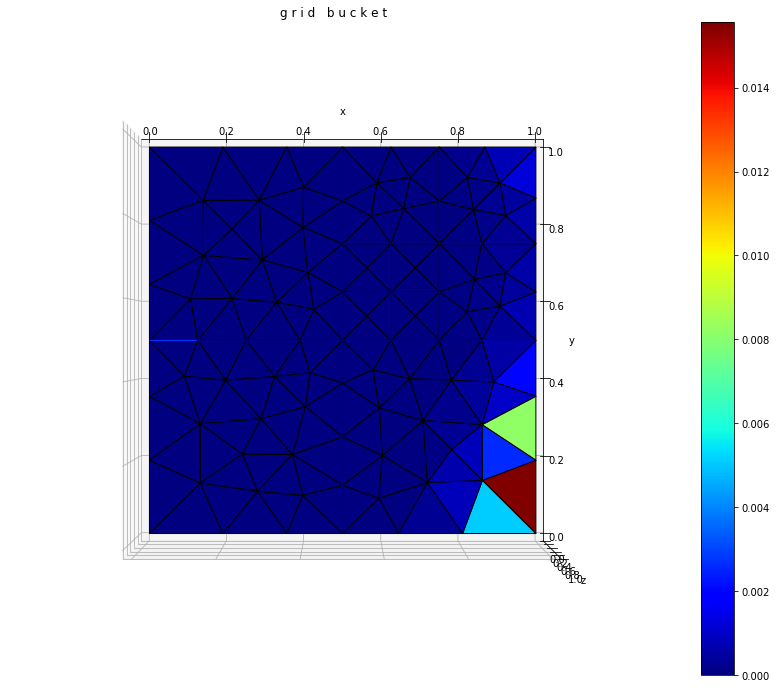

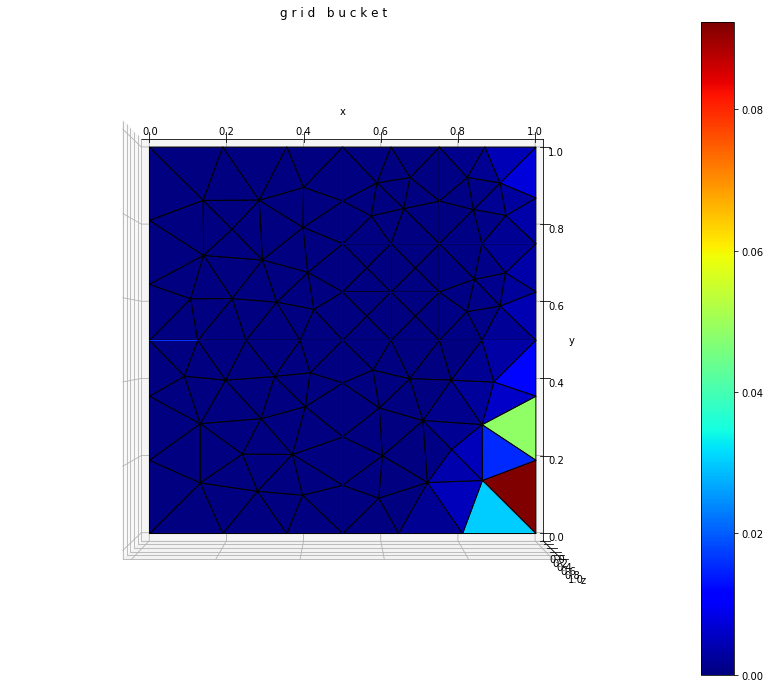

In [14]:
rd=np.zeros(tracer1.size)
#for i in range(10):
#for i in range(n_steps):
for i in range(n_steps):
    if np.isclose(i % save_every, 0):
        # Export existing solution (final export is taken care of below)
        rd=reaction.compute_rd(tracer1,rd)
        assembler_Ca.distribute_variable(
        tracer1,
        variable_names=[Ca,transport.mortar_variable],
    )
        exporter1.write_vtu(export_field1, time_step=int(i // save_every))
        
        assembler_CaSiO3.distribute_variable(
        tracer2,
        variable_names=[CaSiO3,transport.mortar_variable],
    )
        exporter2.write_vtu(export_field2, time_step=int(i // save_every))
    tracer1 = IEsolver_Ca(rhs_mass_Ca * tracer1 + rhs_source_adv_Ca+rhs_mass_Ca*rd*tracer2*parameter["time_step"])
    tracer2 = IEsolver_CaSiO3(rhs_mass_Ca * tracer2 + rhs_source_adv_CaSiO3-rhs_mass_CaSiO3*rd*tracer2*parameter["time_step"])
    #print("tracer1")
    #print(tracer1)
    #print("tracer2")
    #print(tracer2)
    for g,d in gb:
        print("CaSiO3")
        print(d[pp.STATE]["CaSiO3"])
        print("Ca")
        print(d[pp.STATE]["Ca"])
        print("FINE")
    
    
exporter1.write_vtu(export_field1, time_step=(n_steps // save_every))
time_steps = np.arange(
    0, parameter["t_max"] + parameter["time_step"], save_every * parameter["time_step"]
)
    
exporter2.write_vtu(export_field2, time_step=(n_steps // save_every))
time_steps = np.arange(
    0, parameter["t_max"] + parameter["time_step"], save_every * parameter["time_step"]
)
exporter1.write_pvd(time_steps)
exporter2.write_pvd(time_steps)
transport.plot_tracer(Ca)
transport.plot_tracer(CaSiO3)


In [15]:
#for g,d in gb:
    #print("Ca")
    #print(d[pp.STATE]["Ca"])
    #print("CaSiO3")
    #print(d[pp.STATE]["CaSiO3"])
    #print("FINE")